In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df = df[['age','job','marital','education','default','balance','duration']]
df.drop("default", axis=1,inplace=True)
df = df[df['balance'] > 0]
df

,age,job,marital,education,balance,duration
0,59,admin.,married,secondary,2343,1042
1,56,admin.,married,secondary,45,1467
2,41,technician,married,secondary,1270,1389
3,55,services,married,secondary,2476,579
4,54,admin.,married,tertiary,184,673
...,...,...,...,...,...,...
11154,52,technician,married,tertiary,523,113
11155,35,blue-collar,married,secondary,80,38
11157,33,blue-collar,single,primary,1,257
11158,39,services,married,secondary,733,83


In [4]:
df.duplicated().sum()

0

In [5]:
df = df.drop_duplicates()

In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
duration     0
dtype: int64

In [7]:
print("The total number of data-points after removing the rows with duplicated values are:", len(df))

The total number of data-points after removing the rows with duplicated values are: 9700


In [8]:
print("Total categories in the feature Job:\n", df["job"].value_counts(), "\n")
print("Total categories in the feature Education:\n", df["education"].value_counts())

Total categories in the feature Job:
 job
management       2257
blue-collar      1622
technician       1585
admin.           1149
services          781
retired           710
self-employed     357
student           344
unemployed        317
entrepreneur      275
housemaid         240
unknown            63
Name: count, dtype: int64 

Total categories in the feature Education:
 education
secondary    4722
tertiary     3256
primary      1269
unknown       453
Name: count, dtype: int64


In [9]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['job', 'marital', 'education']


In [10]:
df.describe()

,age,balance,duration
count,9700.000000,9700.000000,9700.000000
mean,41.255464,1781.889278,372.763196
std,12.129780,3386.006718,345.912650
min,18.000000,1.000000,2.000000
25%,32.000000,258.000000,140.000000
50%,39.000000,730.000000,257.000000
75%,49.000000,2021.250000,493.000000
max,95.000000,81204.000000,3881.000000


<Axes: xlabel='balance', ylabel='duration'>

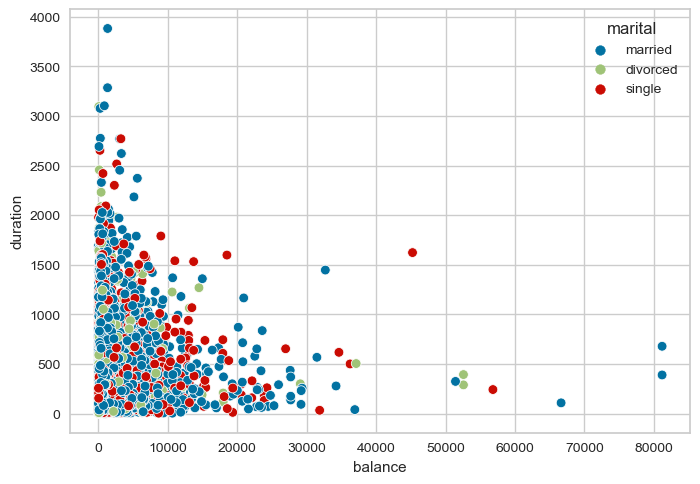

In [11]:
sns.scatterplot(x="balance",y="duration", hue='marital', data=df)

<Axes: xlabel='age', ylabel='balance'>

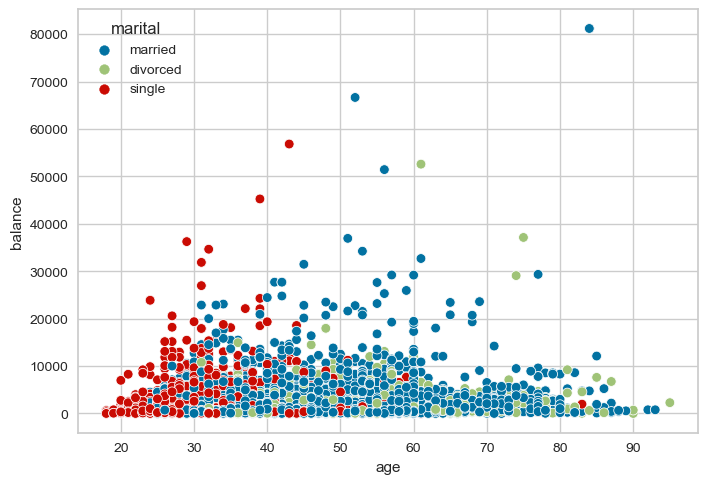

In [12]:
sns.scatterplot(x="age",y="balance", hue='marital', data=df)

<Axes: xlabel='age', ylabel='duration'>

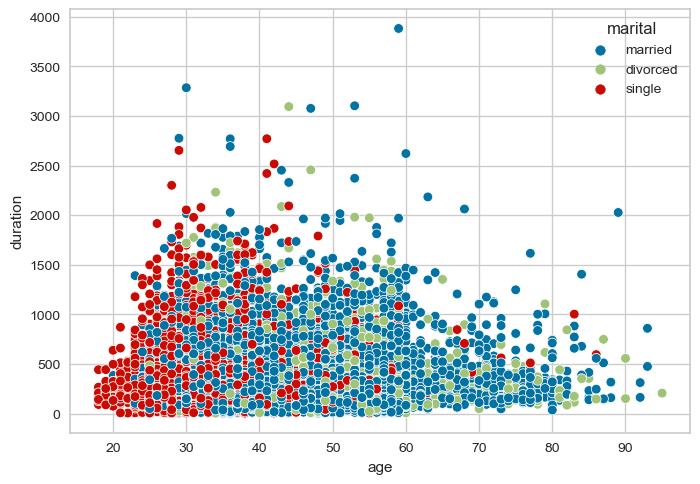

In [13]:
sns.scatterplot(x="age",y="duration", hue='marital', data=df)

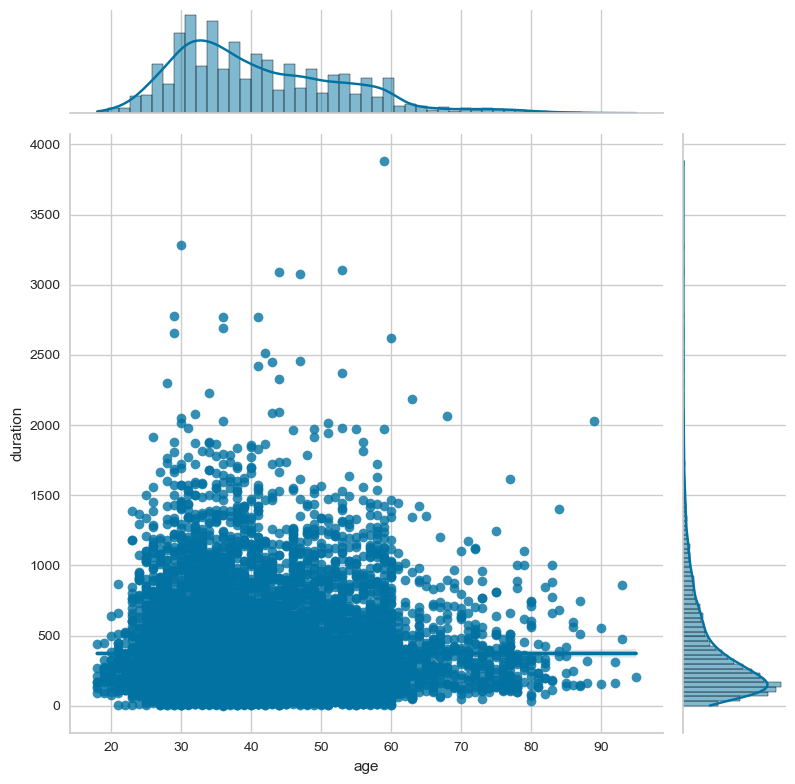

In [14]:
sns.jointplot(x="age",y="duration", data=df, kind="reg", height=8)

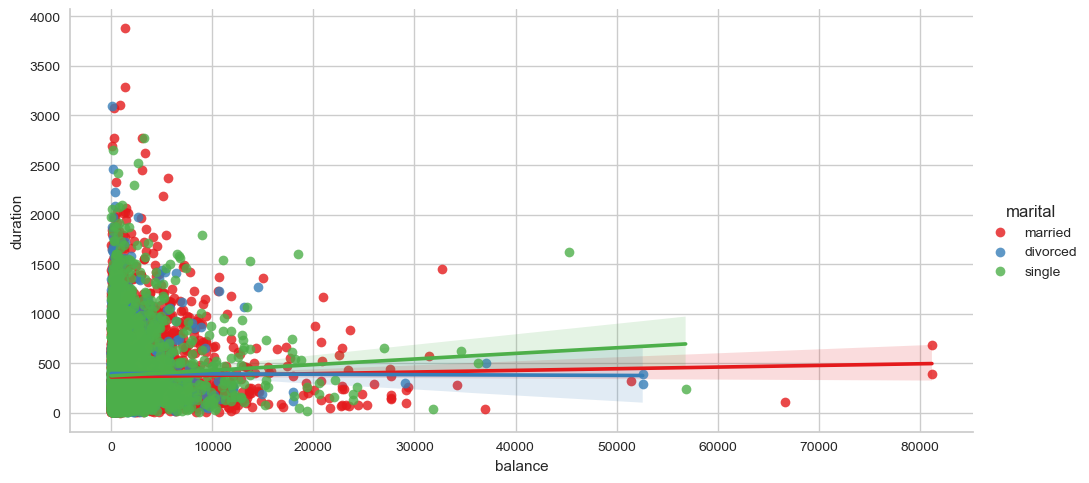

In [15]:
sns.lmplot(x="balance",y="duration", hue="marital", data=df, palette="Set1", aspect=2)

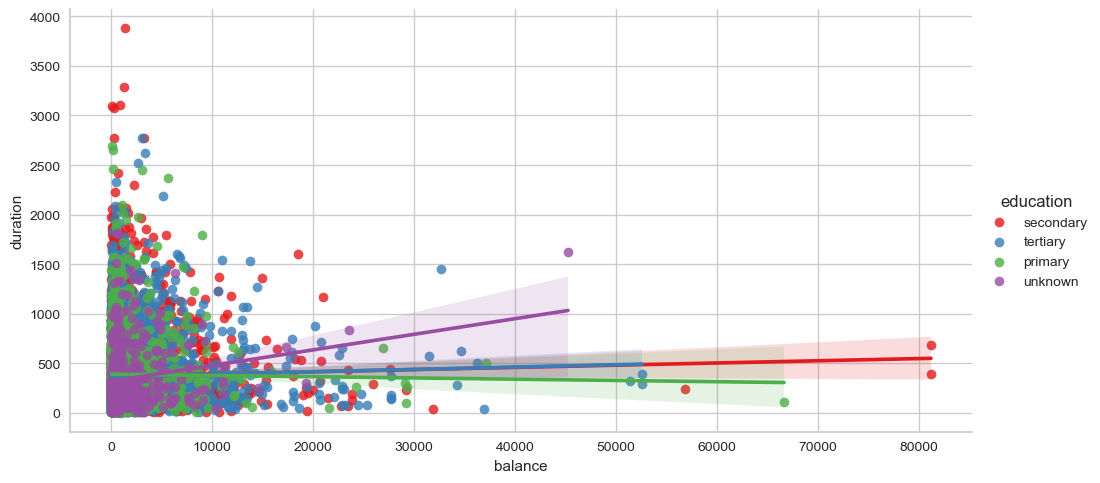

In [16]:
sns.lmplot(x="balance",y="duration", hue="education", data=df, palette="Set1", aspect=2)

In [17]:
df_ohe = pd.get_dummies(df, dtype=int)
df_ohe

,age,balance,duration,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,59,2343,1042,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,56,45,1467,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,41,1270,1389,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,55,2476,579,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,54,184,673,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11154,52,523,113,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
11155,35,80,38,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
11157,33,1,257,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
11158,39,733,83,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


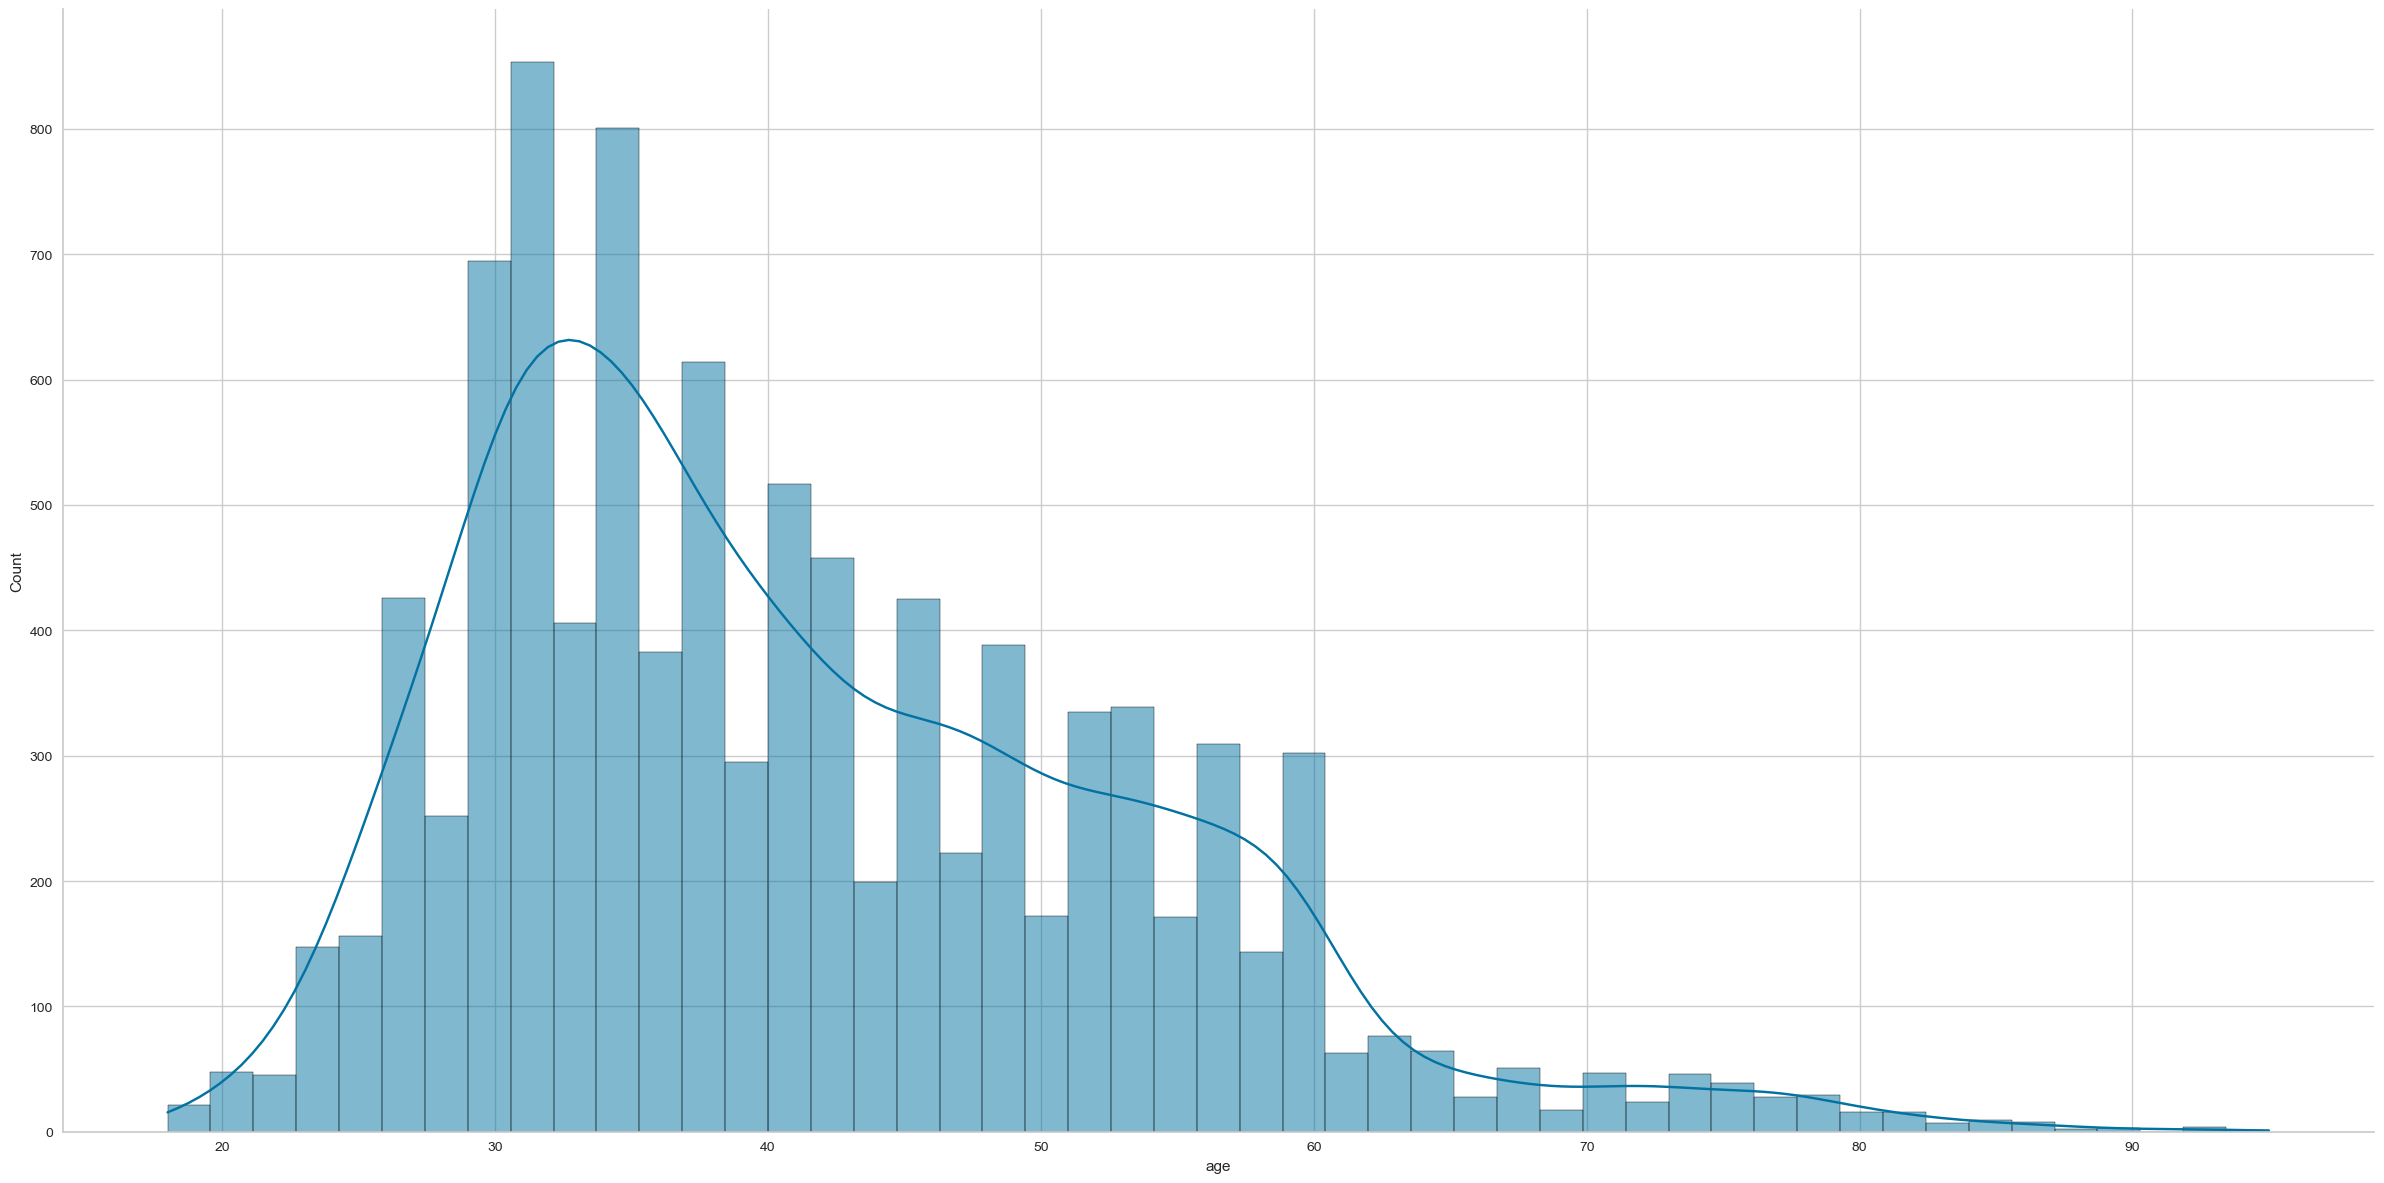

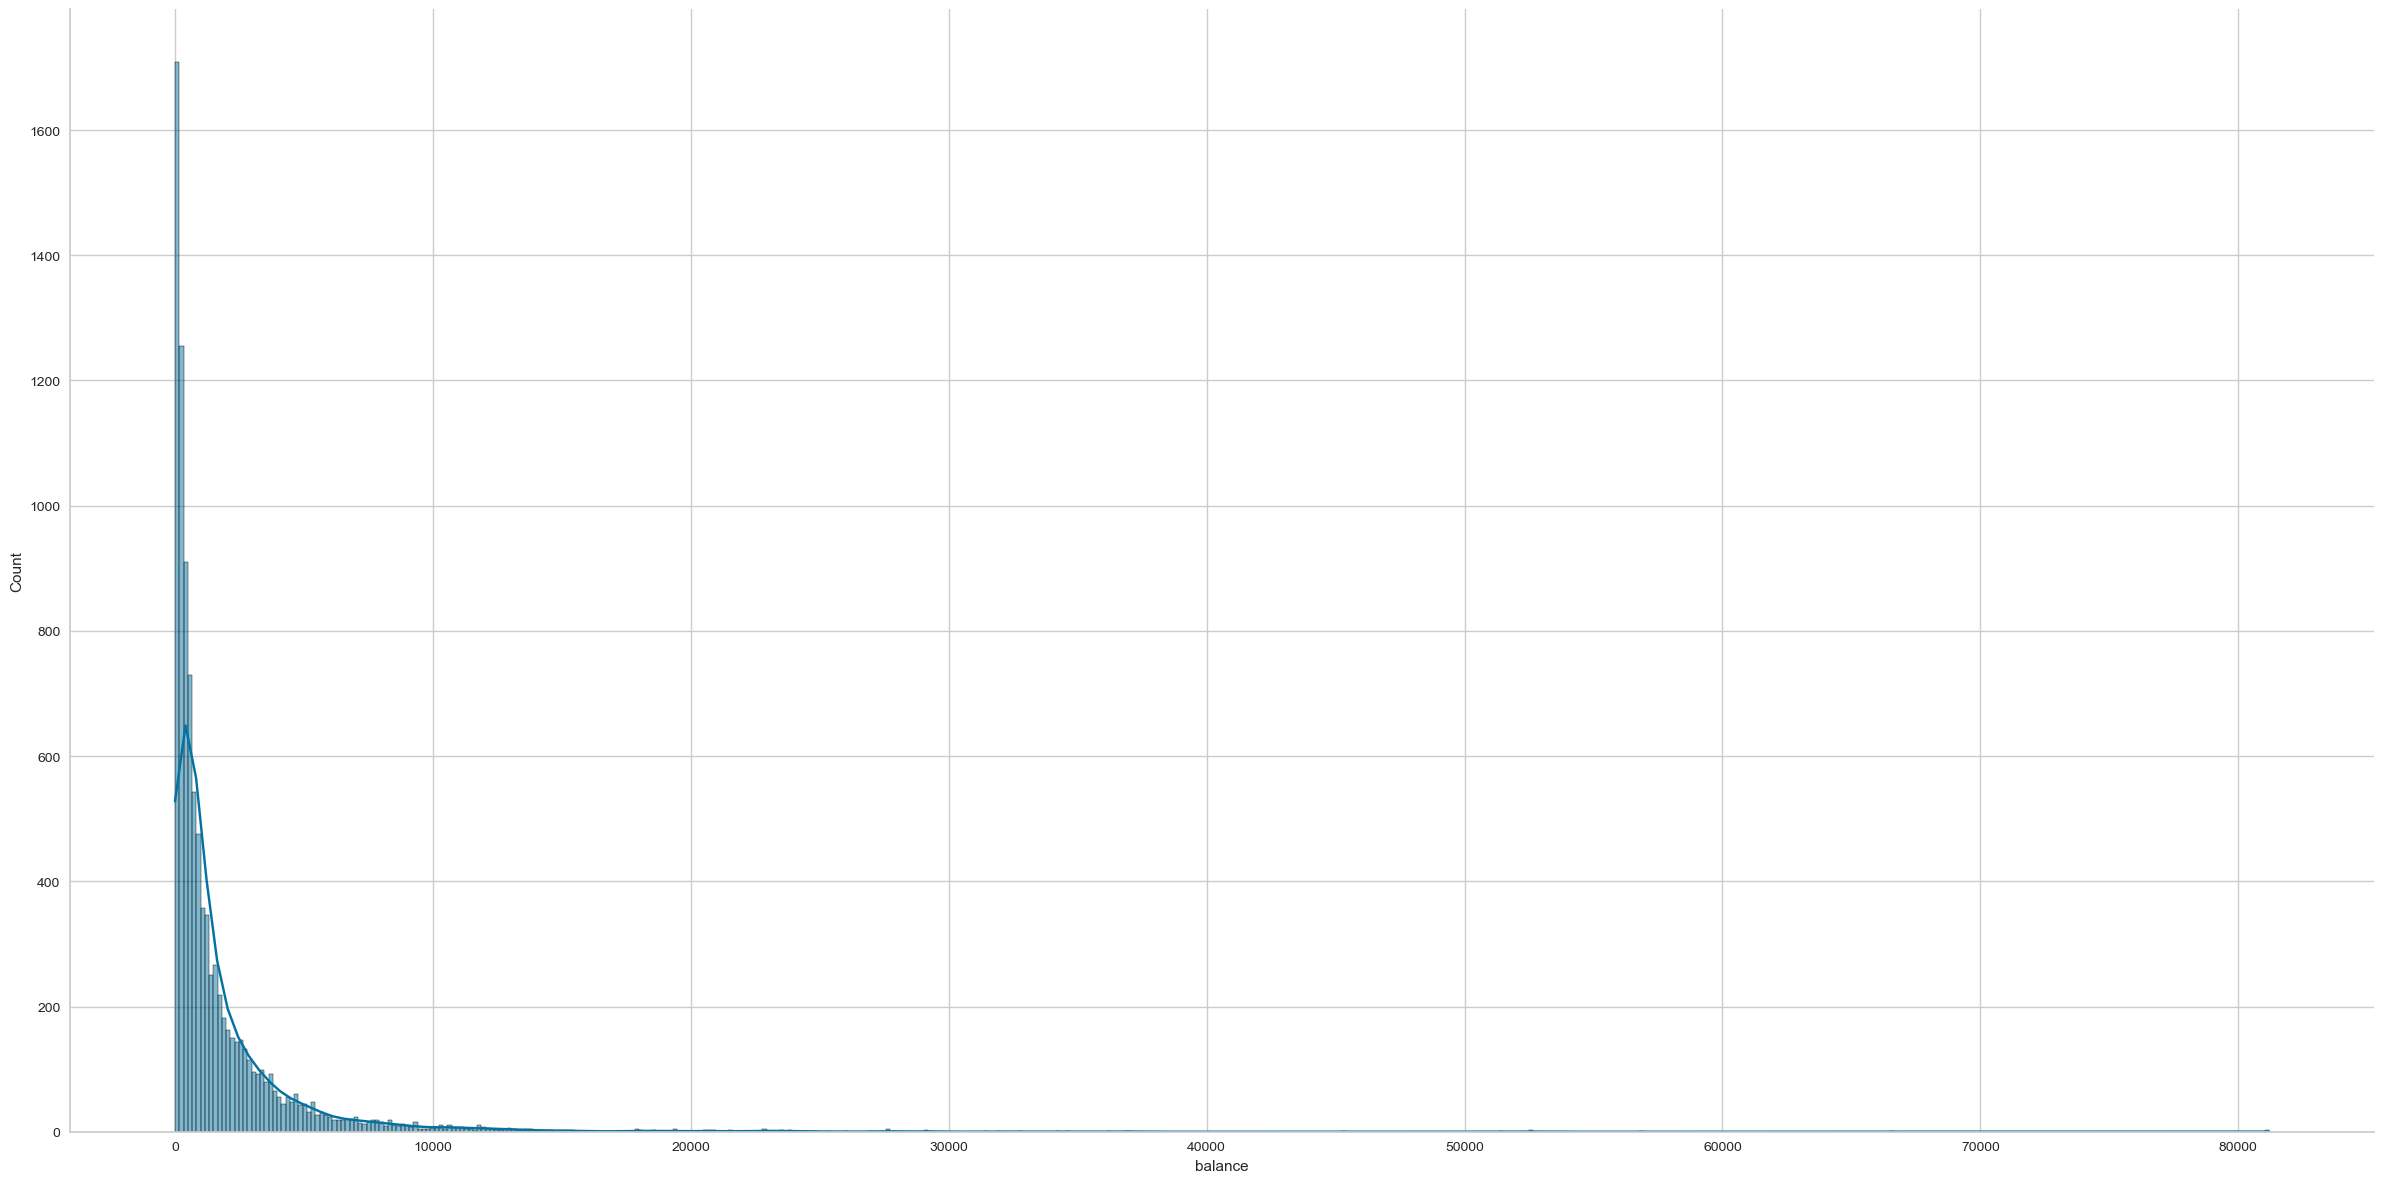

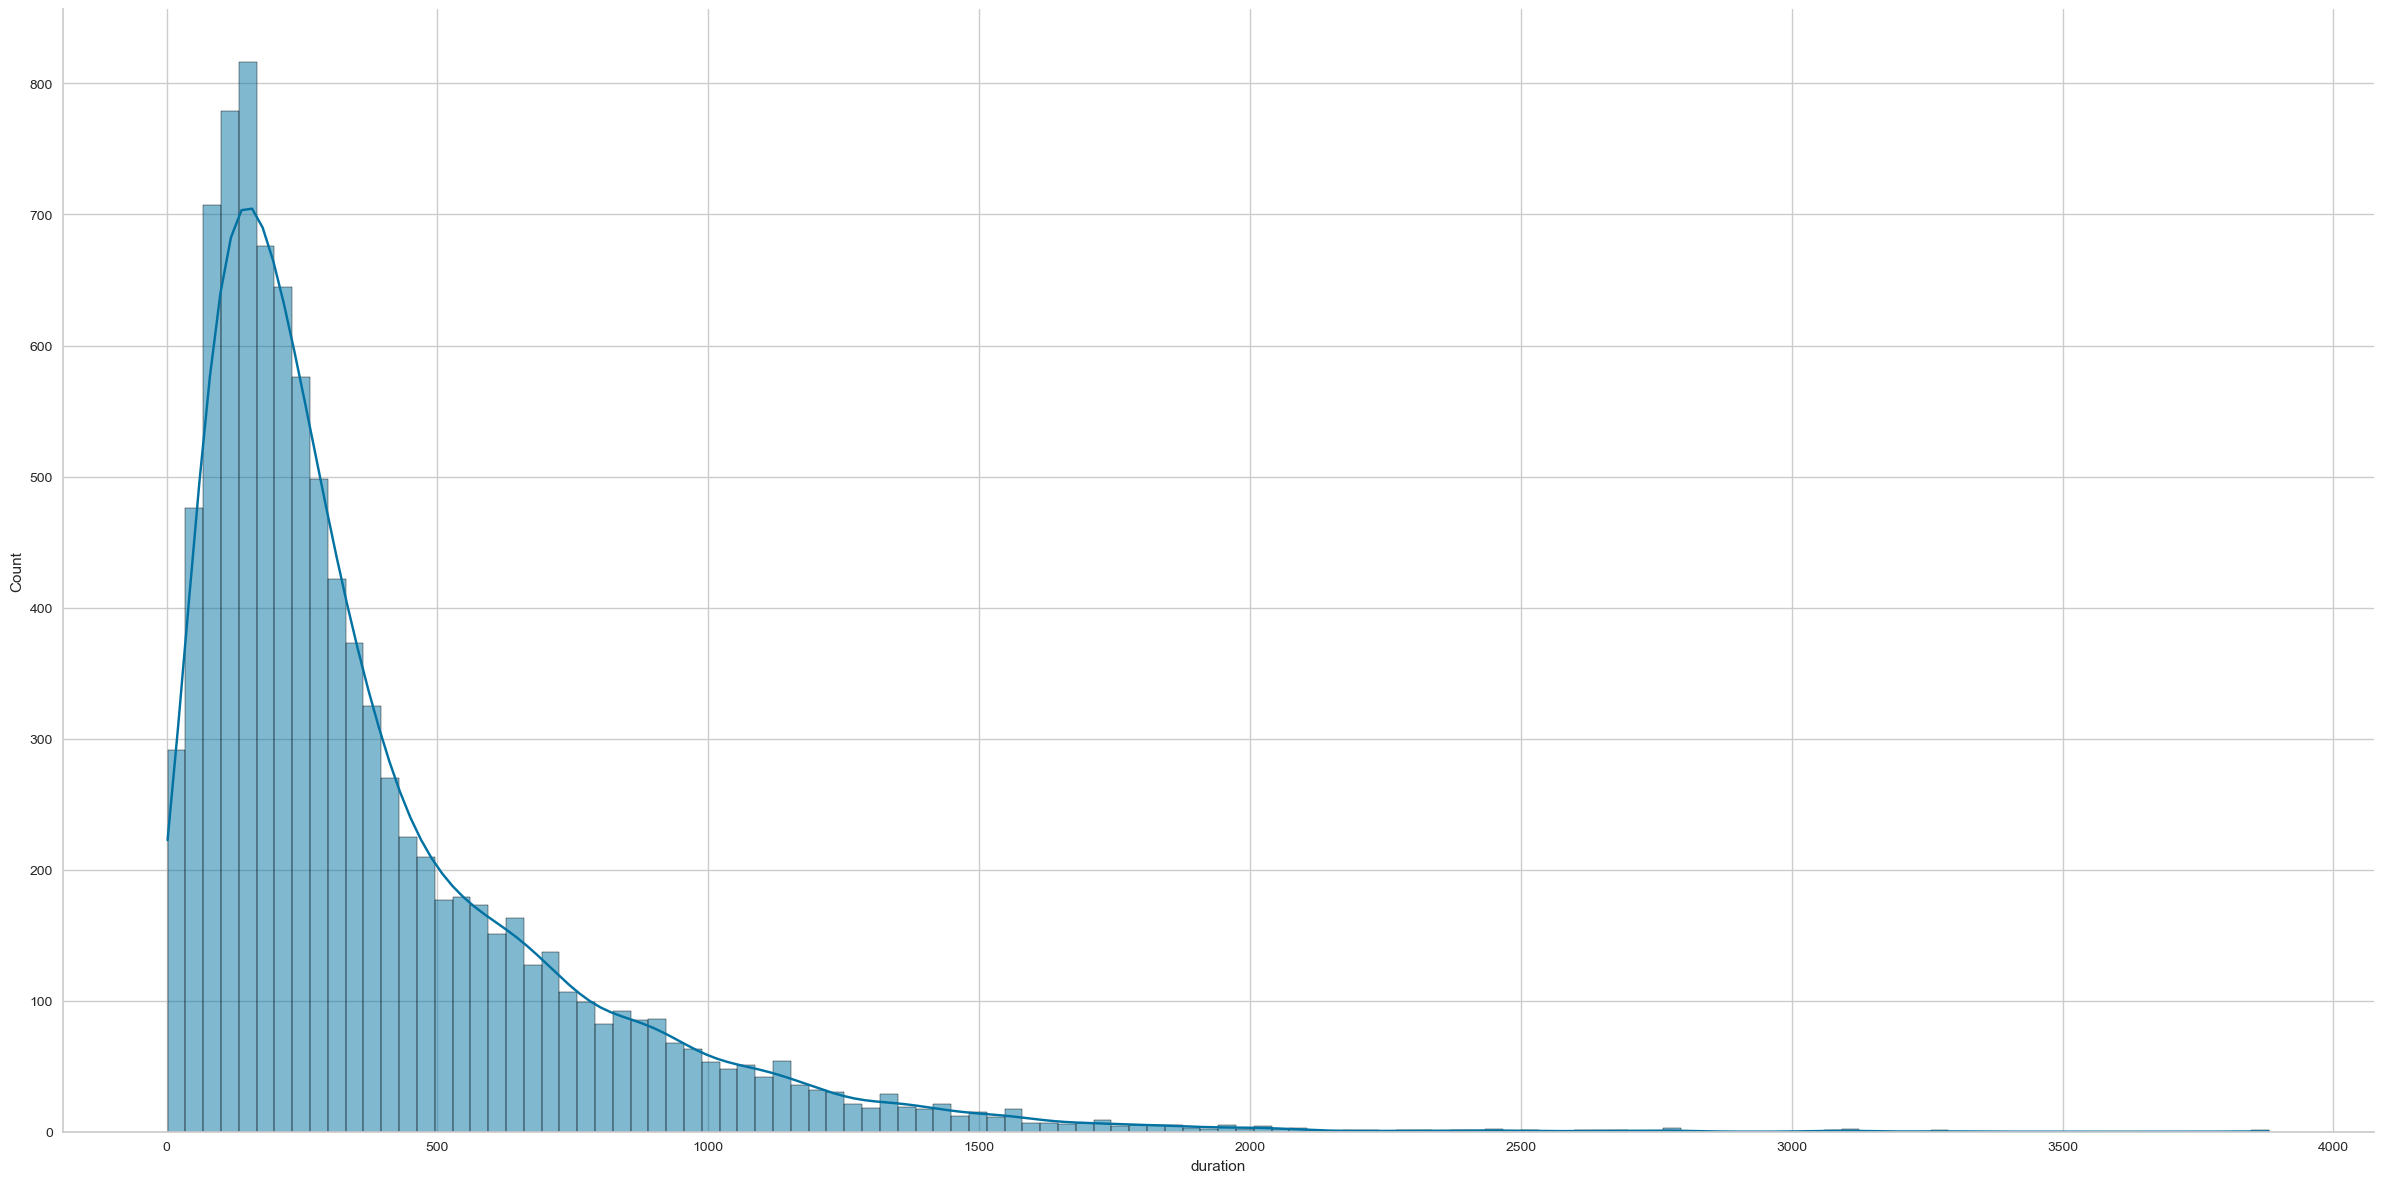

In [18]:
sns.displot(df_ohe['age'], kde=True, height=12, aspect=2)
sns.displot(df_ohe['balance'], kde=True, height=12, aspect=2)
sns.displot(df_ohe['duration'], kde=True, height=12, aspect=2)

In [19]:
df_ohe.dtypes

age                    int64
balance                int64
duration               int64
job_admin.             int64
job_blue-collar        int64
job_entrepreneur       int64
job_housemaid          int64
job_management         int64
job_retired            int64
job_self-employed      int64
job_services           int64
job_student            int64
job_technician         int64
job_unemployed         int64
job_unknown            int64
marital_divorced       int64
marital_married        int64
marital_single         int64
education_primary      int64
education_secondary    int64
education_tertiary     int64
education_unknown      int64
dtype: object

In [20]:
df_ohe[['age', 'balance', 'duration']]

,age,balance,duration
0,59,2343,1042
1,56,45,1467
2,41,1270,1389
3,55,2476,579
4,54,184,673
...,...,...,...
11154,52,523,113
11155,35,80,38
11157,33,1,257
11158,39,733,83


In [21]:
df_ohe[['age', 'balance', 'duration']] = np.log(df_ohe[['age', 'balance', 'duration']])
df_ohe

,age,balance,duration,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,4.077537,7.759187,6.948897,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,4.025352,3.806662,7.290975,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,3.713572,7.146772,7.236339,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,4.007333,7.814400,6.361302,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,3.988984,5.214936,6.511745,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11154,3.951244,6.259581,4.727388,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
11155,3.555348,4.382027,3.637586,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
11157,3.496508,0.000000,5.549076,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
11158,3.663562,6.597146,4.418841,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [22]:
scaler = StandardScaler()
df_ohe[['age', 'balance', 'duration']] = scaler.fit_transform(df_ohe[['age', 'balance', 'duration']])
df_ohe

,age,balance,duration,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,1.408294,0.787853,1.487841,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1.223851,-1.596495,1.844491,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0.121915,0.418416,1.787528,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,1.160168,0.821160,0.875214,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1.095316,-0.746959,1.032066,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11154,0.961928,-0.116779,-0.828306,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
11155,-0.437303,-1.249408,-1.964533,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
11157,-0.645266,-3.892853,0.028387,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
11158,-0.054839,0.086855,-1.149997,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


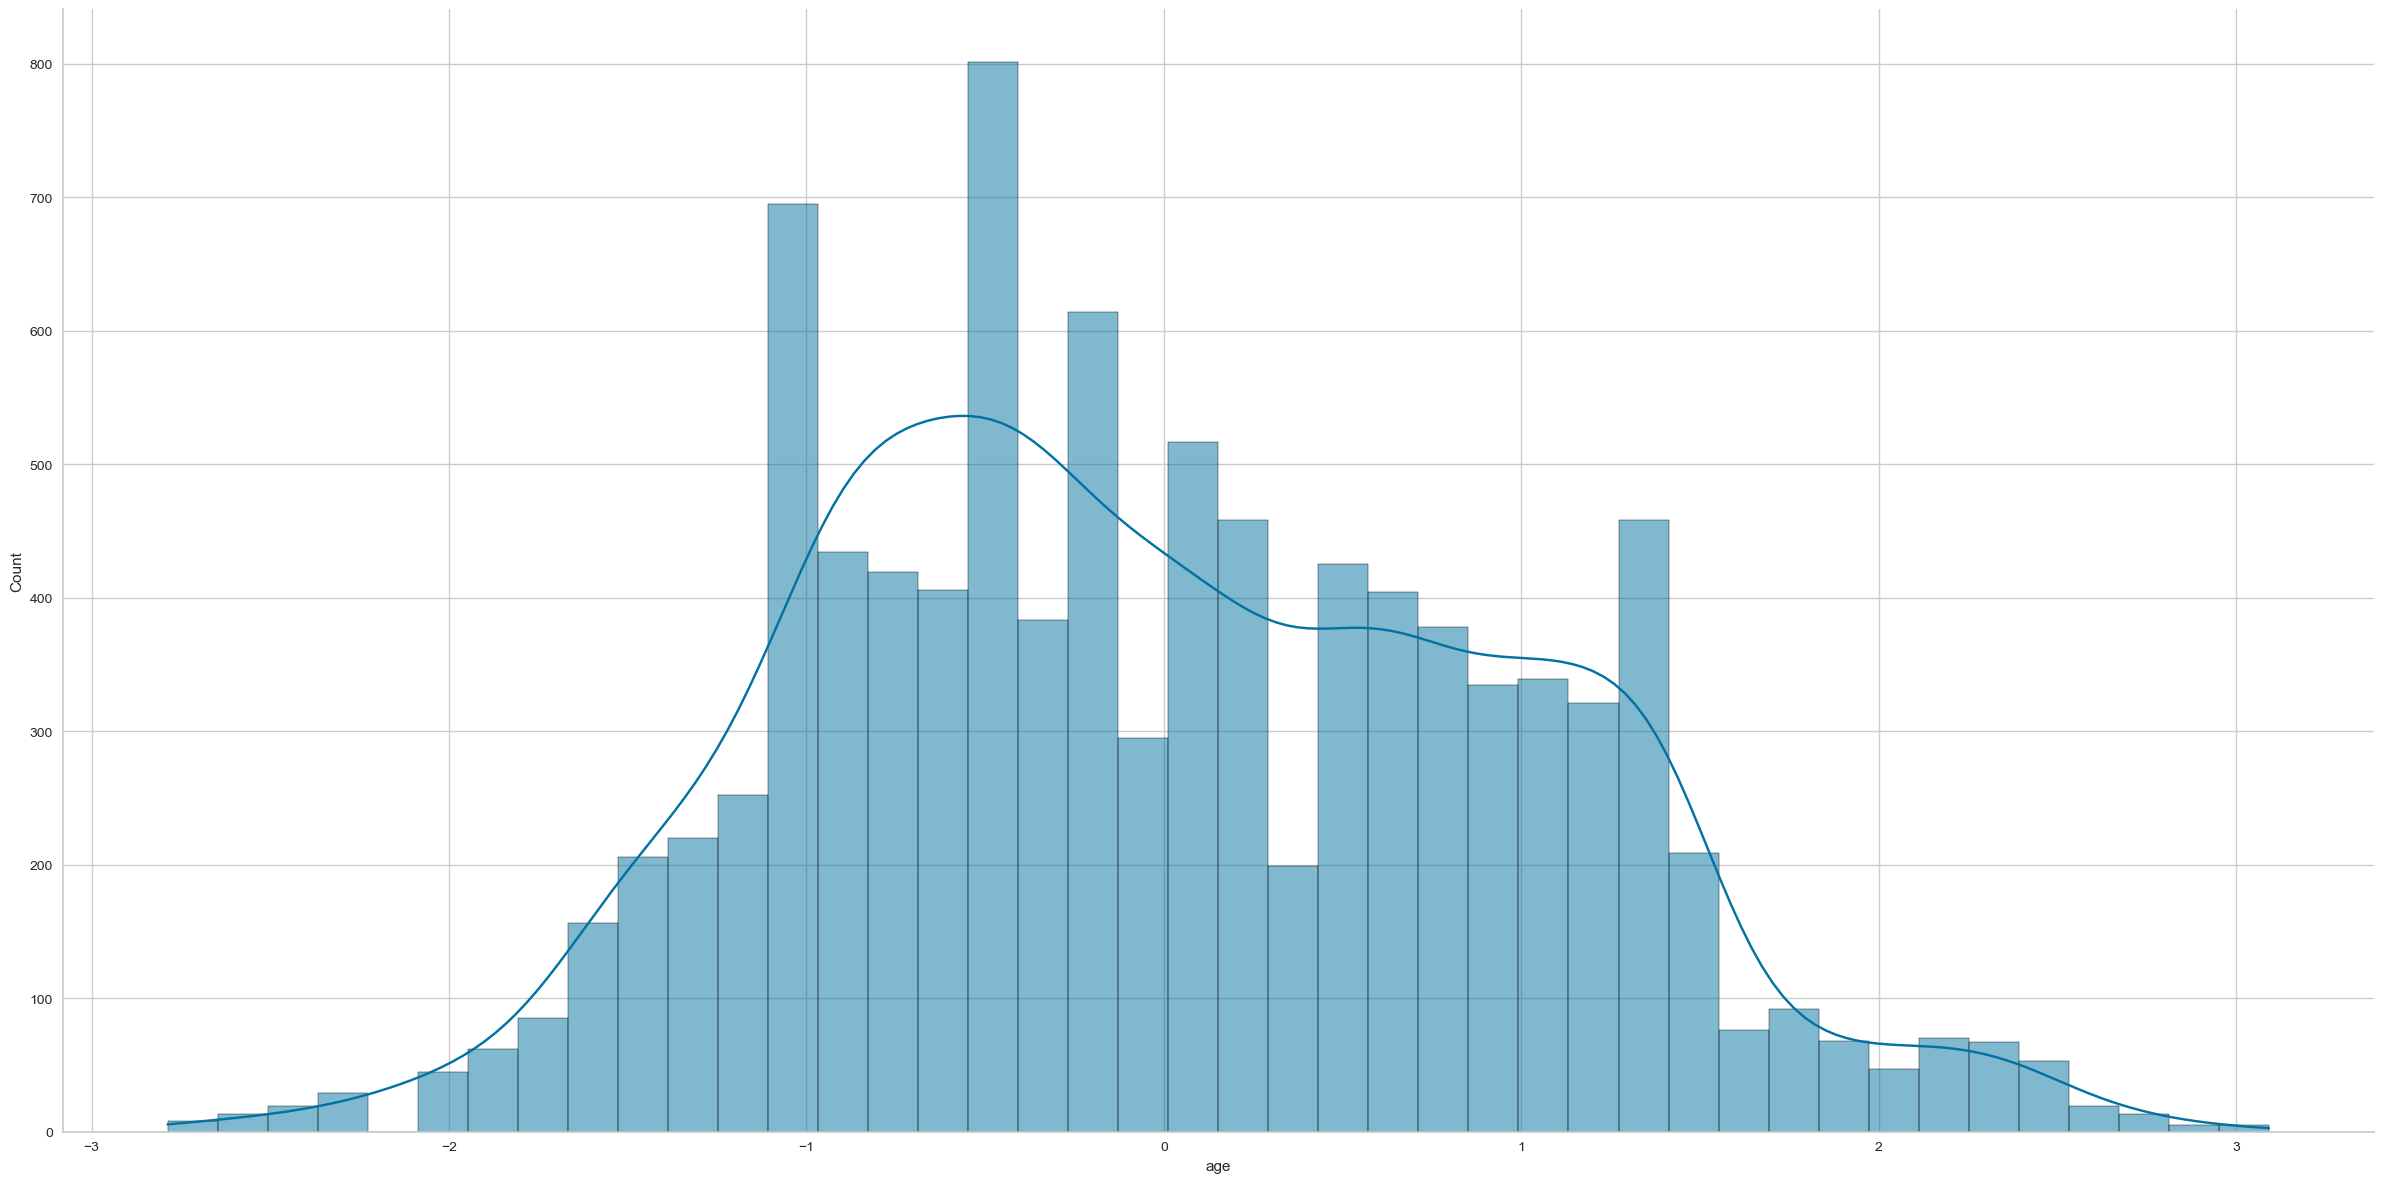

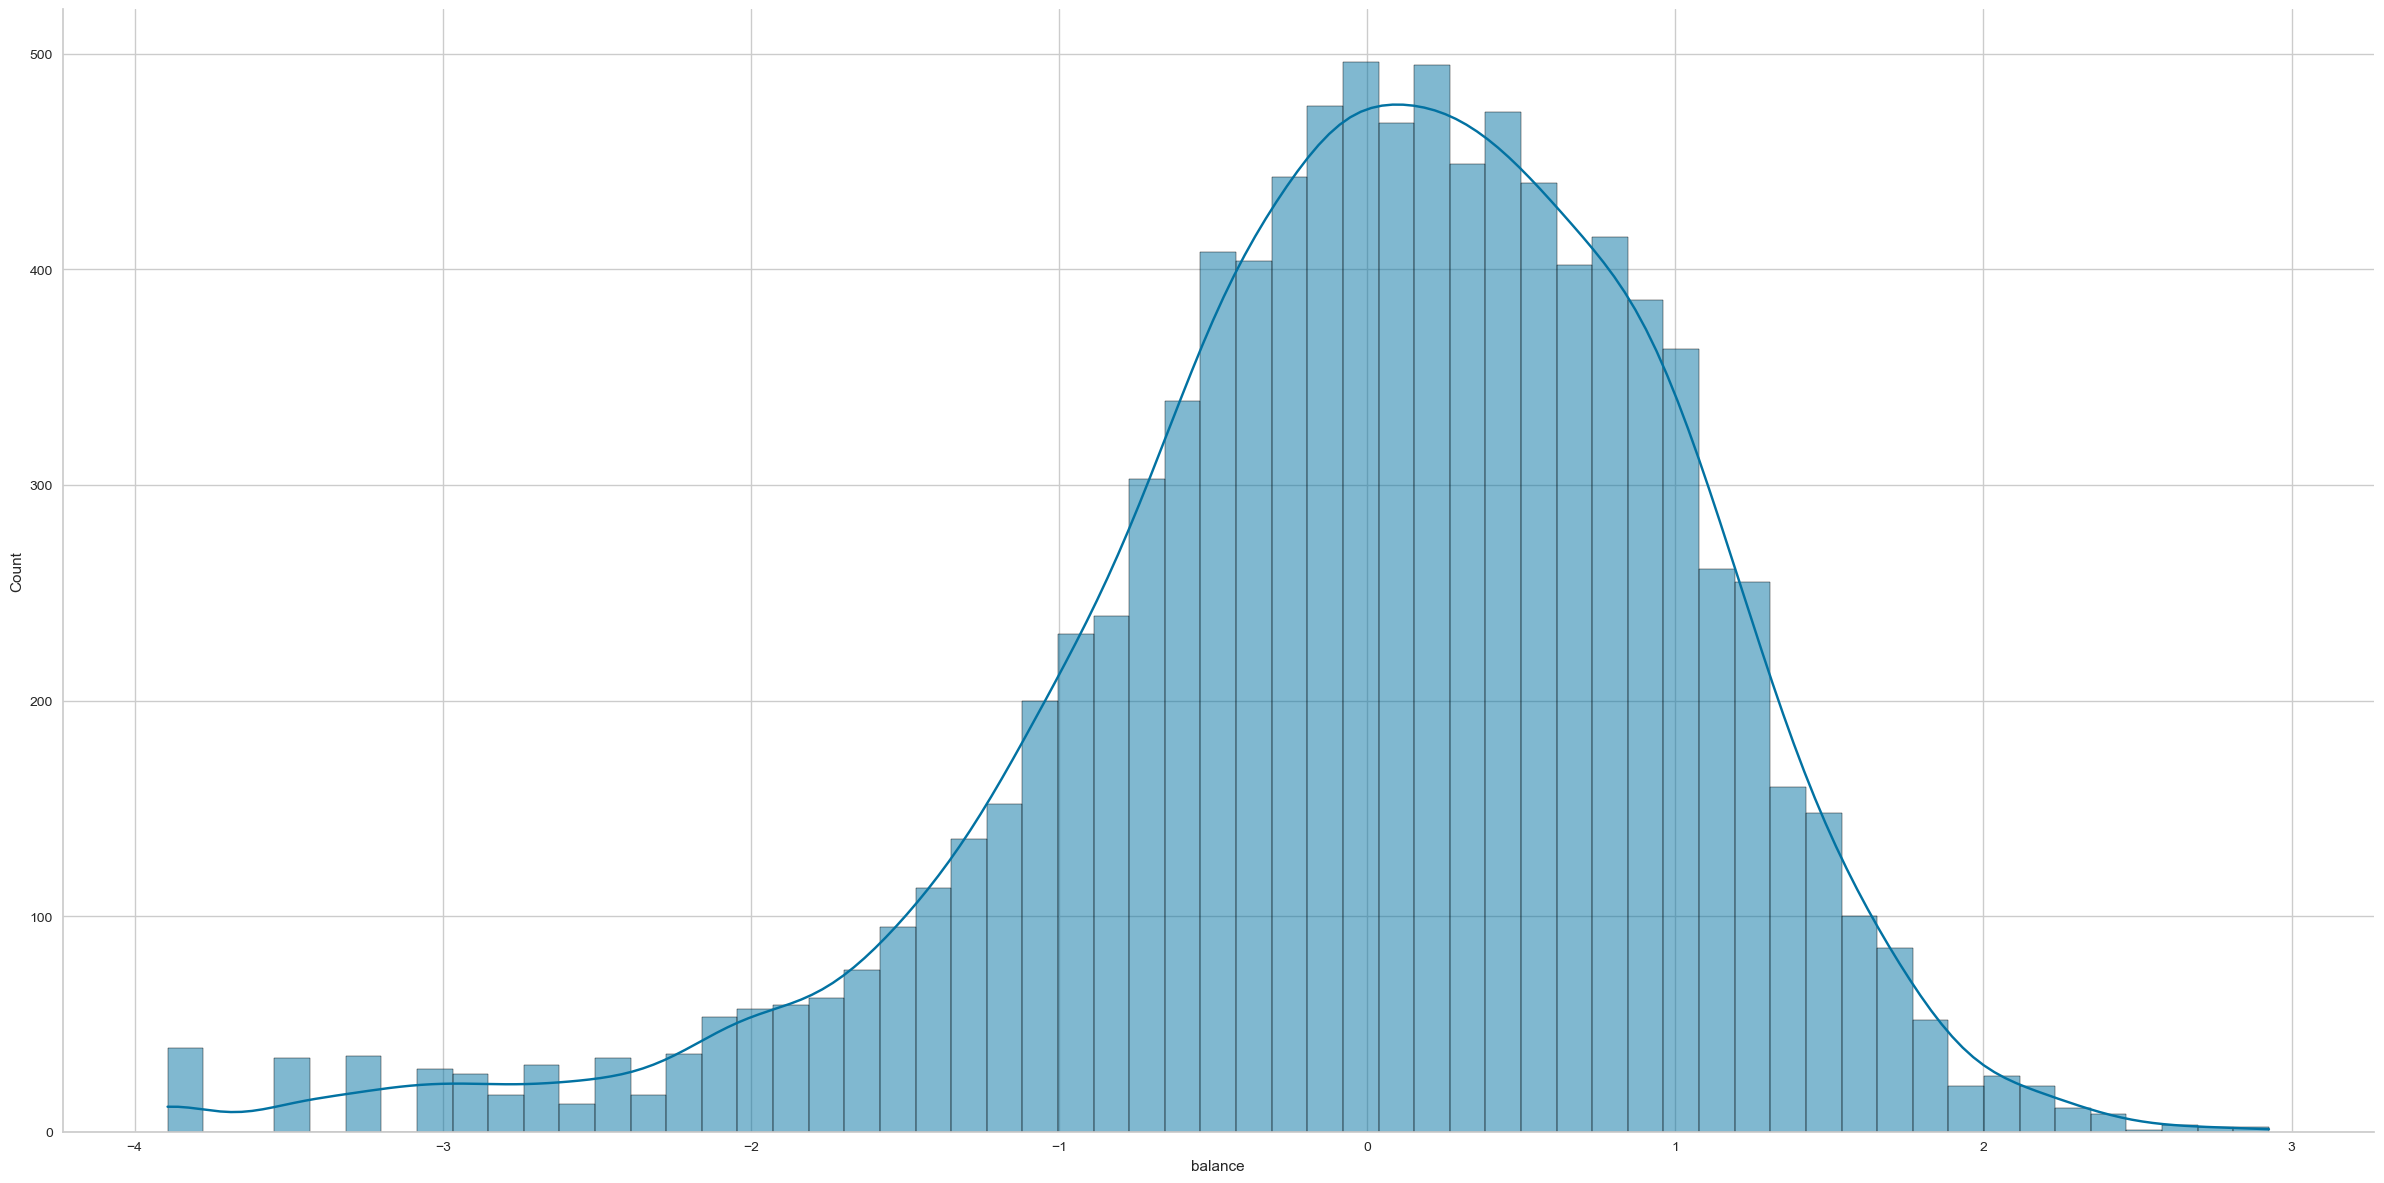

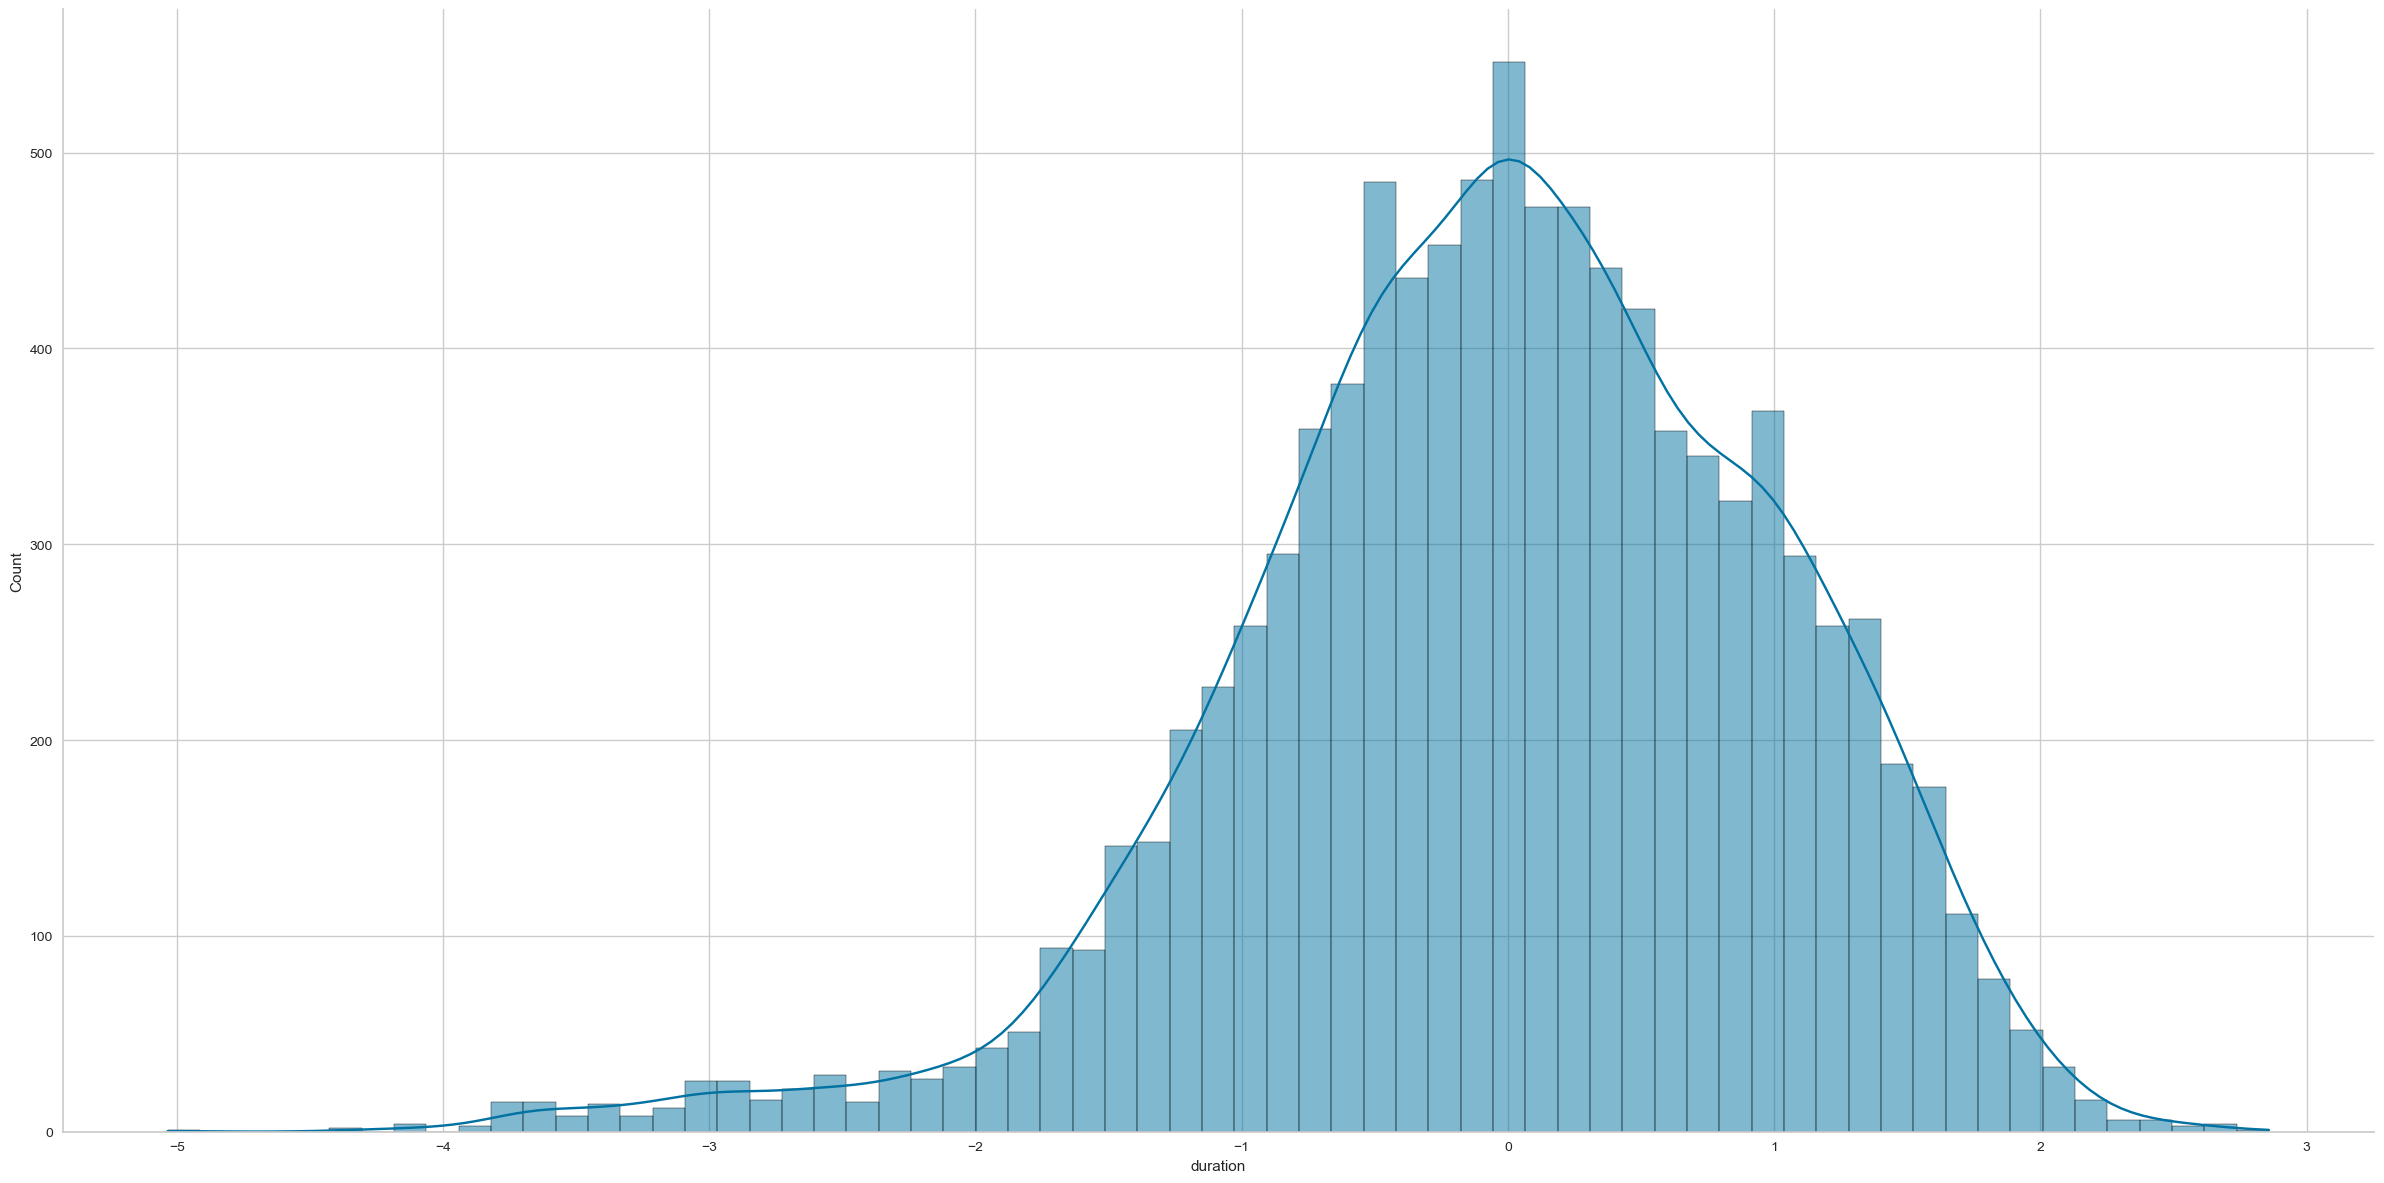

In [23]:
sns.displot(df_ohe['age'], kde=True, height=12, aspect=2)
sns.displot(df_ohe['balance'], kde=True, height=12, aspect=2)
sns.displot(df_ohe['duration'], kde=True, height=12, aspect=2)

/home/danialmirxa/miniconda3/envs/UM_Master/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/danialmirxa/miniconda3/envs/UM_Master/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/danialmirxa/miniconda3/envs/UM_Master/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/danialmirxa/miniconda3/envs/UM_Master/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

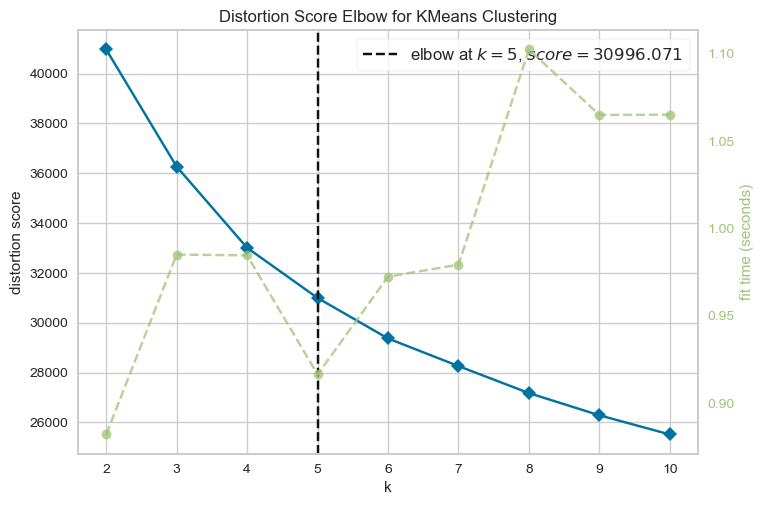

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_ohe)
Elbow_M.show()

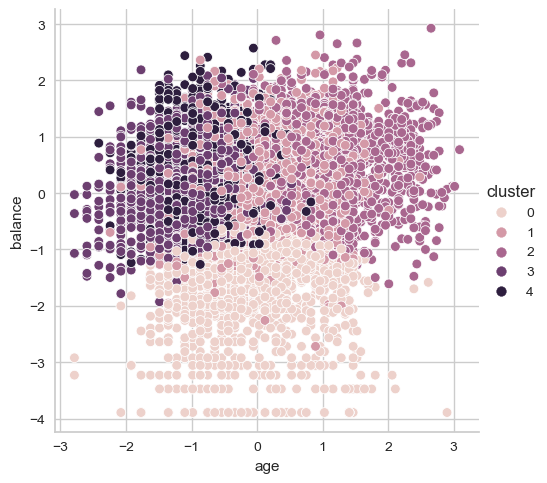

In [25]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=30, max_iter=100)
clusters = kmeans.fit_predict(df_ohe)
df_ohe['cluster'] = clusters
sns.relplot(x='age', y='balance', hue='cluster', data=df_ohe)

In [26]:
df = pd.read_csv('bank.csv')
df = df[['age','job','marital','education','default','balance','duration']]
df = df.drop(columns='default')
df = df[df['balance'] > 0]
df = df.drop_duplicates()
df

,age,job,marital,education,balance,duration
0,59,admin.,married,secondary,2343,1042
1,56,admin.,married,secondary,45,1467
2,41,technician,married,secondary,1270,1389
3,55,services,married,secondary,2476,579
4,54,admin.,married,tertiary,184,673
...,...,...,...,...,...,...
11154,52,technician,married,tertiary,523,113
11155,35,blue-collar,married,secondary,80,38
11157,33,blue-collar,single,primary,1,257
11158,39,services,married,secondary,733,83


In [27]:
df['cluster'] = clusters
df.head(20)

,age,job,marital,education,balance,duration,cluster
0,59,admin.,married,secondary,2343,1042,2
1,56,admin.,married,secondary,45,1467,0
2,41,technician,married,secondary,1270,1389,2
3,55,services,married,secondary,2476,579,2
4,54,admin.,married,tertiary,184,673,2
6,56,management,married,tertiary,830,1201,2
7,60,retired,divorced,secondary,545,1030,2
8,37,technician,married,secondary,1,608,0
9,28,services,single,secondary,5090,1297,3
10,38,admin.,single,secondary,100,786,3


In [28]:
groups = df.drop(['job', 'marital', 'education'], axis=1).groupby(['cluster']).agg(['min', 'median', 'mean', 'max', 'sum', 'count']).round()
groups

age                                balance                          
        min median  mean max     sum count     min  median    mean    max   
cluster                                                                     
0        18   38.0  40.0  90   51135  1277       1    50.0    64.0    244  \
1        21   42.0  43.0  80   77484  1818       7   800.0  1707.0  36935   
2        34   54.0  55.0  95  142041  2595      44  1464.0  2731.0  81204   
3        18   31.0  31.0  47   68177  2182      26   628.0  1299.0  23878   
4        20   33.0  34.0  51   61341  1828      45  1068.0  2285.0  45248   

                       duration                                     
             sum count      min median   mean   max      sum count  
cluster                                                             
0          81271  1277        7  226.0  319.0  3094   407310  1277  
1        3102875  1818        2   82.0   85.0   226   154175  1818  
2        7087785  2595       71  369.0  487.0  3881  1264989  2595  
3        2834928  2182       56  339.0  464.0  3284  1012407  2182  
4        4177467  1828       55  309.0  425.0  2769   776922  1828

In [29]:
groups['pct_total'] = (groups['balance']['sum'] / groups['balance']['sum'].sum()).round(3)*100
groups

age                                balance                          
        min median  mean max     sum count     min  median    mean    max   
cluster                                                                     
0        18   38.0  40.0  90   51135  1277       1    50.0    64.0    244  \
1        21   42.0  43.0  80   77484  1818       7   800.0  1707.0  36935   
2        34   54.0  55.0  95  142041  2595      44  1464.0  2731.0  81204   
3        18   31.0  31.0  47   68177  2182      26   628.0  1299.0  23878   
4        20   33.0  34.0  51   61341  1828      45  1068.0  2285.0  45248   

                       duration                                    pct_total  
             sum count      min median   mean   max      sum count            
cluster                                                                       
0          81271  1277        7  226.0  319.0  3094   407310  1277       0.5  
1        3102875  1818        2   82.0   85.0   226   154175  1818      18.0  
2        7087785  2595       71  369.0  487.0  3881  1264989  2595      41.0  
3        2834928  2182       56  339.0  464.0  3284  1012407  2182      16.4  
4        4177467  1828       55  309.0  425.0  2769   776922  1828      24.2

In [30]:
groups = df.groupby(['cluster', 'job', 'marital', 'education']).agg(['median', 'sum', 'count']).round()

In [31]:
groups

age             balance                
                                      median   sum count  median    sum count   
cluster job        marital  education                                           
0       admin.     divorced secondary   39.0   643    16    63.0   1173    16  \
                            tertiary    36.0    36     1   125.0    125     1   
                   married  primary     40.0   117     3   189.0    475     3   
                            secondary   39.0  3770    93    67.0   7398    93   
                            tertiary    34.0   768    21    69.0   1576    21   
...                                      ...   ...   ...     ...    ...   ...   
4       unemployed married  tertiary    36.0   307     9   482.0  17486     9   
                   single   tertiary    33.0  1212    37  1291.0  83111    37   
        unknown    married  tertiary    31.0    31     1   526.0    526     1   
                   single   tertiary    41.0    41     1  1567.0   1567     1   
                            unknown     41.0   113     3   942.0   8813     3   

                                      duration               
                                        median    sum count  
cluster job        marital  education                        
0       admin.     divorced secondary    538.0   8265    16  
                            tertiary     172.0    172     1  
                   married  primary      645.0   1654     3  
                            secondary    214.0  26486    93  
                            tertiary     203.0   4815    21  
...                                        ...    ...   ...  
4       unemployed married  tertiary     309.0   4136     9  
                   single   tertiary     366.0  17622    37  
        unknown    married  tertiary     130.0    130     1  
                   single   tertiary     291.0    291     1  
                            unknown      245.0    805     3  

[438 rows x 9 columns]

In [32]:
groups['pct_total'] = (groups['balance']['sum'] / groups['balance']['sum'].sum()).round(3)*100

In [33]:
top = groups.sort_values(by='pct_total', ascending=False)
top.head(60)

age               balance   
                                         median    sum count   median   
cluster job           marital  education                                
4       management    single   tertiary    32.0  19685   603   1026.0  \
                      married  tertiary    36.0  14859   416   1143.0   
2       management    married  tertiary    53.0  13409   251   1624.0   
        retired       married  secondary   63.0  12717   195   1696.0   
        blue-collar   married  primary     48.0   8754   183   1381.0   
        technician    married  secondary   50.0   9123   180   1179.0   
4       technician    single   tertiary    32.0   5778   179   1081.0   
3       technician    single   secondary   31.0   9066   283    736.0   
2       retired       married  primary     70.0  11345   165   1588.0   
1       management    married  tertiary    43.0   8077   187    789.0   
2       blue-collar   married  secondary   47.0   8760   182   1214.0   
1       technician    married  secondary   41.0   6356   153    966.0   
2       admin.        married  secondary   50.0   6667   131   1597.0   
3       blue-collar   single   secondary   30.0   6051   202    634.0   
        student       single   secondary   25.0   4033   162    520.0   
        blue-collar   married  secondary   33.0   6883   210    628.0   
        admin.        single   secondary   30.0   6691   215    557.0   
2       retired       married  tertiary    65.0   5150    78   2232.0   
1       blue-collar   married  secondary   41.0   6727   162    846.0   
3       technician    married  secondary   33.0   4851   146    672.0   
2       management    divorced tertiary    55.0   3277    60   2138.0   
4       self-employed single   tertiary    30.0   2719    87   1049.0   
        technician    married  tertiary    35.0   2633    76   1340.0   
1       blue-collar   married  primary     43.0   5031   117    679.0   
2       services      married  secondary   48.0   4196    88   1317.0   
1       admin.        married  secondary   42.0   5460   128    920.0   
3       admin.        married  secondary   32.0   3817   118    795.0   
        services      married  secondary   33.0   3819   115    702.0   
                      single   secondary   29.0   4722   158    492.0   
4       student       single   tertiary    27.0   1654    60   1175.0   
2       retired       divorced primary     74.0   3712    51    802.0   
4       management    divorced tertiary    38.0   3329    87    858.0   
2       management    married  secondary   50.0   2574    51   1880.0   
        entrepreneur  married  tertiary    53.0   1112    21   2331.0   
        self-employed divorced tertiary    61.0    286     5   6610.0   
1       services      married  secondary   39.0   3546    87    804.0   
2       technician    married  tertiary    49.0   2455    49   1320.0   
        retired       divorced secondary   60.0   2812    44   1220.0   
4       admin.        single   tertiary    31.0   2039    65    832.0   
1       admin.        single   secondary   40.0   2244    56    784.0   
2       admin.        single   secondary   51.0   1293    25   2223.0   
        unemployed    married  secondary   50.0   2593    51   1289.0   
        management    married  unknown     55.0   1964    35   2149.0   
        technician    divorced secondary   52.0   1742    34   1884.0   
        self-employed married  tertiary    58.0   1508    27   1636.0   
        entrepreneur  married  secondary   47.0   1234    25    887.0   
        admin.        divorced secondary   49.0   1986    39   1693.0   
        self-employed married  secondary   48.0   1155    24   1538.0   
1       technician    single   secondary   36.0   1656    44    590.0   
4       unemployed    single   tertiary    33.0   1212    37   1291.0   
1       technician    married  tertiary    39.0   1518    37    717.0   
        management    divorced tertiary    45.0   1784    39    787.0   
2       housemaid     married

In [34]:
df["cluster"].value_counts()

cluster
2    2595
3    2182
4    1828
1    1818
0    1277
Name: count, dtype: int64

<Axes: ylabel='count'>

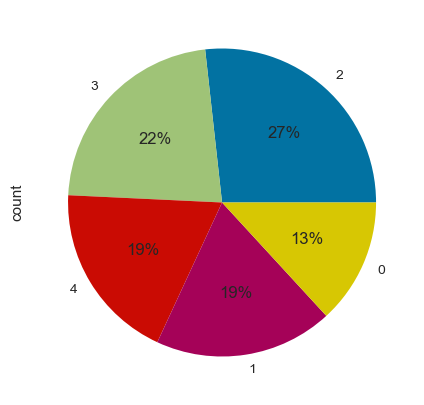

In [35]:
df["cluster"].value_counts().plot.pie(y='count', figsize=(5, 5), autopct='%1.0f%%')

Text(0, 0.5, 'Total number of clusters')

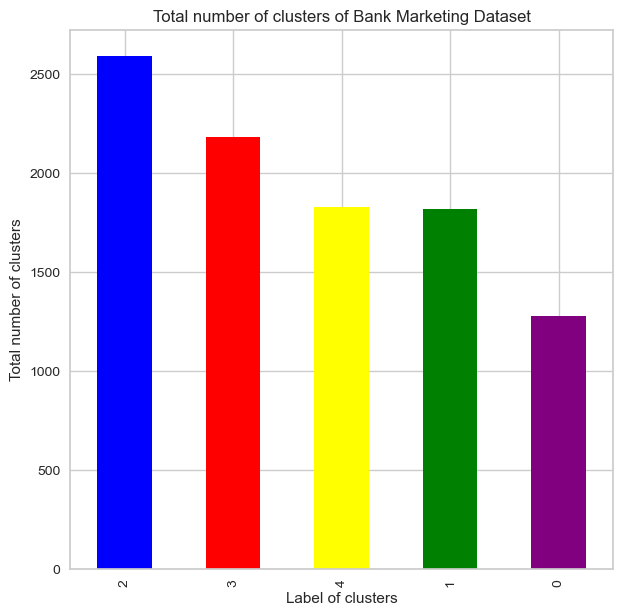

In [44]:
df["cluster"].value_counts().plot.bar(y='count', figsize=(7, 7), color=['blue', 'red', 'yellow', 'green', 'purple'])
plt.title("Total number of clusters of Bank Marketing Dataset")
plt.xlabel("Label of clusters")
plt.ylabel("Total number of clusters")

In [37]:
df[df["cluster"]==1]['job'].value_counts()

job
blue-collar      373
management       342
technician       326
admin.           269
services         170
entrepreneur      78
self-employed     62
housemaid         60
unemployed        56
retired           49
unknown           17
student           16
Name: count, dtype: int64

In [45]:
df

,age,job,marital,education,balance,duration,cluster
0,59,admin.,married,secondary,2343,1042,2
1,56,admin.,married,secondary,45,1467,0
2,41,technician,married,secondary,1270,1389,2
3,55,services,married,secondary,2476,579,2
4,54,admin.,married,tertiary,184,673,2
...,...,...,...,...,...,...,...
11154,52,technician,married,tertiary,523,113,1
11155,35,blue-collar,married,secondary,80,38,1
11157,33,blue-collar,single,primary,1,257,0
11158,39,services,married,secondary,733,83,1


In [49]:
df[['age', 'balance', 'duration','cluster']].groupby(['cluster']).mean().round(1)

,age,balance,duration
cluster,,,
0,40.0,63.6,319.0
1,42.6,1706.8,84.8
2,54.7,2731.3,487.5
3,31.2,1299.2,464.0
4,33.6,2285.3,425.0


In [55]:
pd.DataFrame(df[['job','marital','education','cluster']].groupby('cluster').value_counts())

count
cluster job           marital  education       
0       management    married  tertiary     137
        admin.        married  secondary     93
        blue-collar   married  primary       82
                               secondary     78
        technician    married  secondary     66
...                                         ...
4       unknown       single   tertiary       1
        management    divorced unknown        1
        student       divorced tertiary       1
        housemaid     single   primary        1
        self-employed married  primary        1

[438 rows x 1 columns]

In [ ]:
df[df["cluster"]==1]['education'].value_counts()

In [ ]:
df[(df["cluster"]==1) & (df["marital"]=="married")]

In [ ]:
df.dtypes

In [ ]:
df.groupby(['job', 'marital', 'education']).agg(['median', 'sum', 'count'])

In [ ]:
df[['job', 'cluster']].groupby(['cluster']).sum()

In [ ]:
plot.pie(y='mass', figsize=(5, 5))

In [ ]:
def age_range(x):
    if x < 18:
        return "under age"
    elif 18 >= x < 30:
        return "18 to 30"
    elif 30 >= x < 50:
        return "30 to 65"
    elif 50 >= x < 65:
        return "50 to 65"
    else:
        return "above 65"

In [ ]:
 df["age"].apply(lambda x: age_range(x)).value_counts()